# Iris Classification

![Iris](https://content.codecademy.com/programs/machine-learning/k-means/iris.svg)


Image from: https://www.codecademy.com/

***

## Setup

***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

<br>

## The Iris Dataset

***

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [4]:
# Have a look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>

### Visualise

***

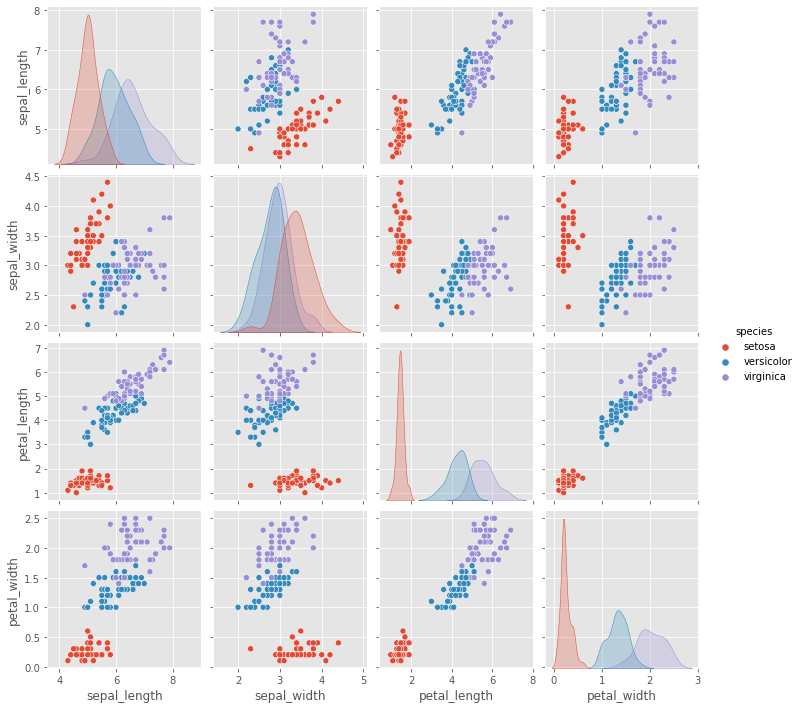

In [6]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species');

<br>

### Two Dimensions

***

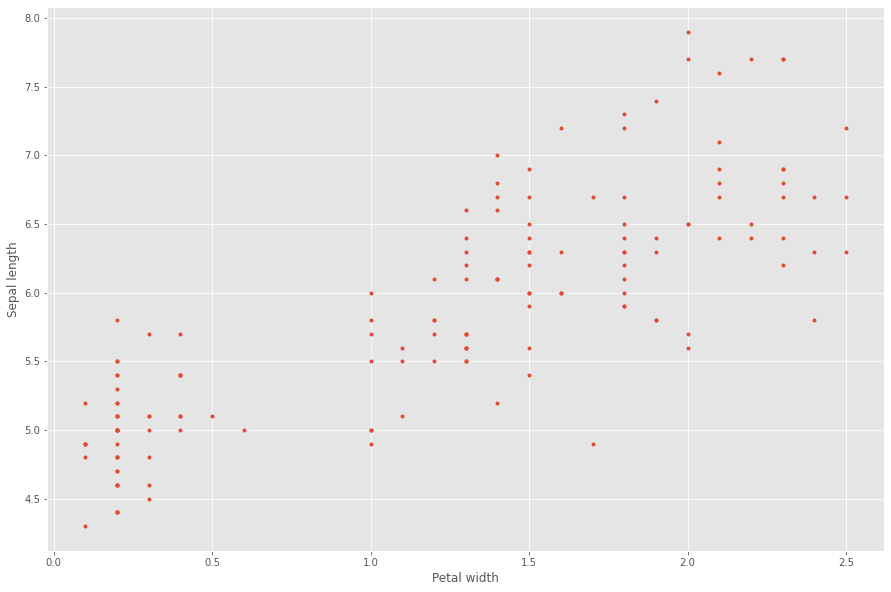

In [7]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');

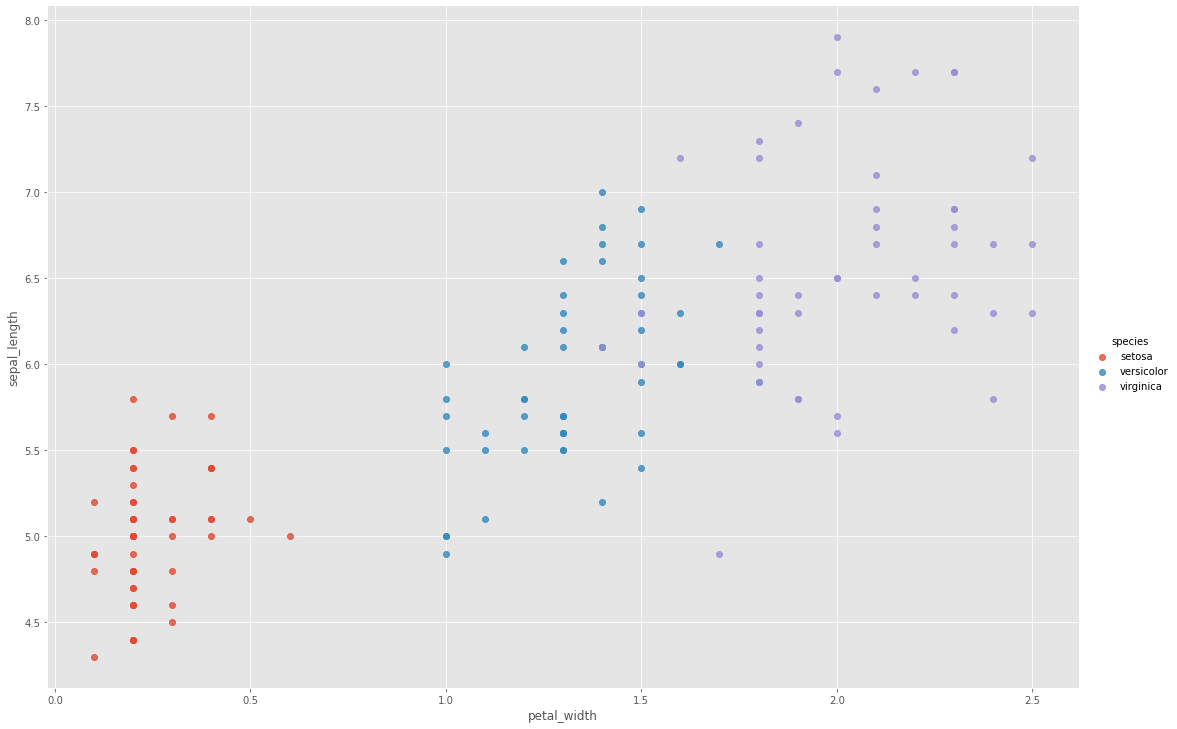

In [8]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=False, height=10, aspect=1.5);

<br>

### Using pyplot

***

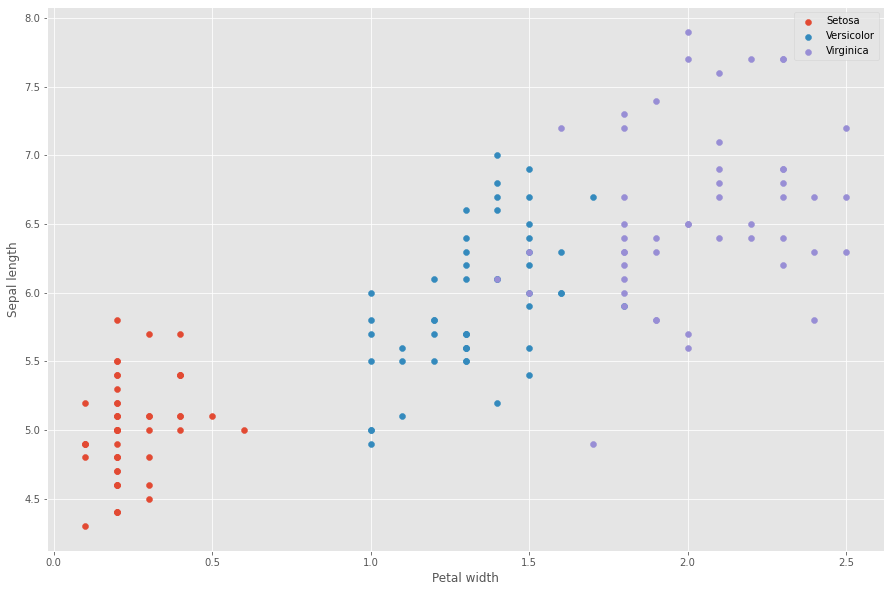

In [9]:
# Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [10]:
# How the segregation works.
df['species'] == 'virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [11]:
df[df['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


<br>

### Using groupby()

***

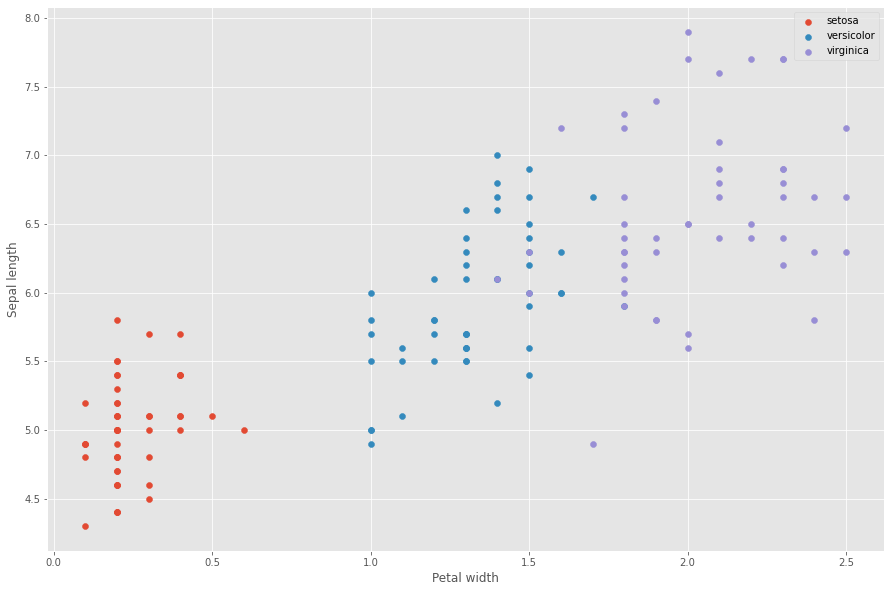

In [12]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [13]:
# Group by typically takes a categorical variable.
x = df.groupby('species')
x

In [14]:
# Pivot tables.
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [15]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



<br>

## Test and Train Split

***

In [16]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [17]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,versicolor
78,6.0,2.9,4.5,1.5,versicolor
26,5.0,3.4,1.6,0.4,setosa
119,6.0,2.2,5.0,1.5,virginica
105,7.6,3.0,6.6,2.1,virginica


In [18]:
# The indices of the train array.
train.index

Int64Index([ 67,  78,  26, 119, 105,  69,  58, 123,  53,  74,
            ...
             81,  18, 131, 120,  13, 130,  31,  84, 134, 141],
           dtype='int64', length=112)

In [19]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
75,6.6,3.0,4.4,1.4,versicolor
1,4.9,3.0,1.4,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica


In [20]:
test.index.size

38

<br>

### Two Dimensions: Test Train Split

***

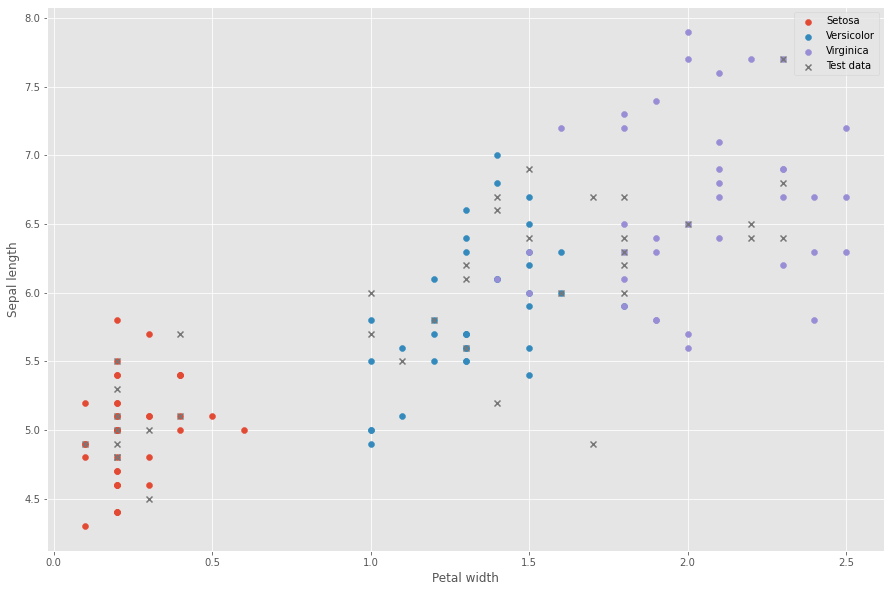

In [21]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

<br>

### Two Dimensions: Inputs and outputs

***

In [22]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [23]:
# Peek at the inputs.
inputs.head()

,sepal_length,petal_width
67,5.8,1.0
78,6.0,1.5
26,5.0,0.4
119,6.0,1.5
105,7.6,2.1


In [24]:
# Peek at the outputs.
outputs.head()

67     versicolor
78     versicolor
26         setosa
119     virginica
105     virginica
Name: species, dtype: object

<br>

## Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


***

In [25]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [26]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [27]:
# Eyeball the misclassifications.
predictions == test['species']

48      True
51      True
75      True
1       True
138     True
97      True
65      True
80      True
103     True
52     False
62      True
36      True
37      True
44      True
115     True
77     False
15      True
35      True
40      True
108     True
71      True
59      True
94      True
110     True
0       True
104     True
143     True
92      True
106    False
41      True
135     True
85      True
132     True
79      True
30      True
126     True
137     True
24      True
Name: species, dtype: bool

In [28]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.9210526315789473

<br>

## Two Dimensions: Misclassified

***

In [29]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-29-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
48,5.3,3.7,1.5,0.2,setosa,setosa
51,6.4,3.2,4.5,1.5,versicolor,versicolor
75,6.6,3.0,4.4,1.4,versicolor,versicolor
1,4.9,3.0,1.4,0.2,setosa,setosa
138,6.0,3.0,4.8,1.8,virginica,virginica


In [30]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
52,6.9,3.1,4.9,1.5,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor


In [31]:
# Eyeball the descriptive statistics for the species.
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.992105,3.431579,1.457895,0.244737
versicolor,5.872222,2.744444,4.266667,1.322222
virginica,6.647368,2.986842,5.600000,2.034211


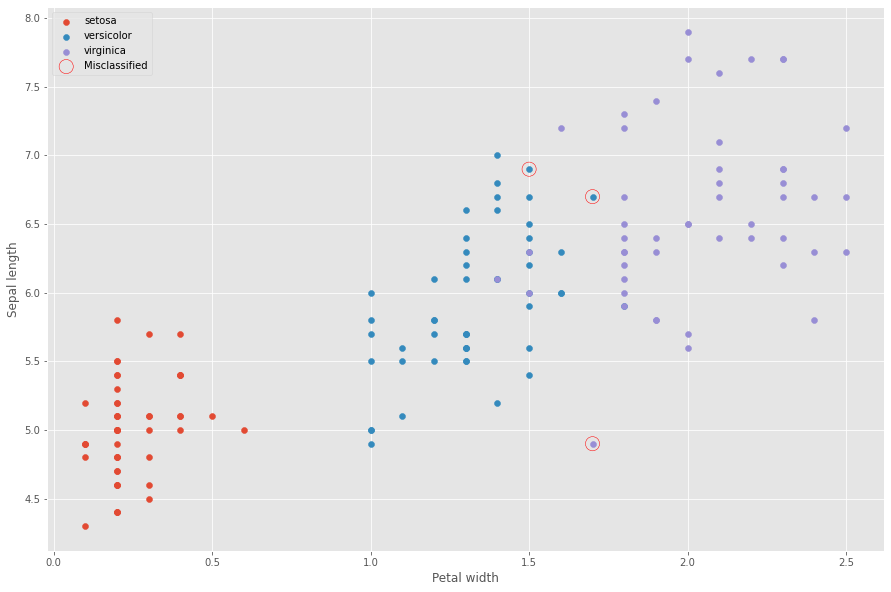

In [32]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

<br>

## Separating Setosa


***

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):

$$\ell = \log_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

***

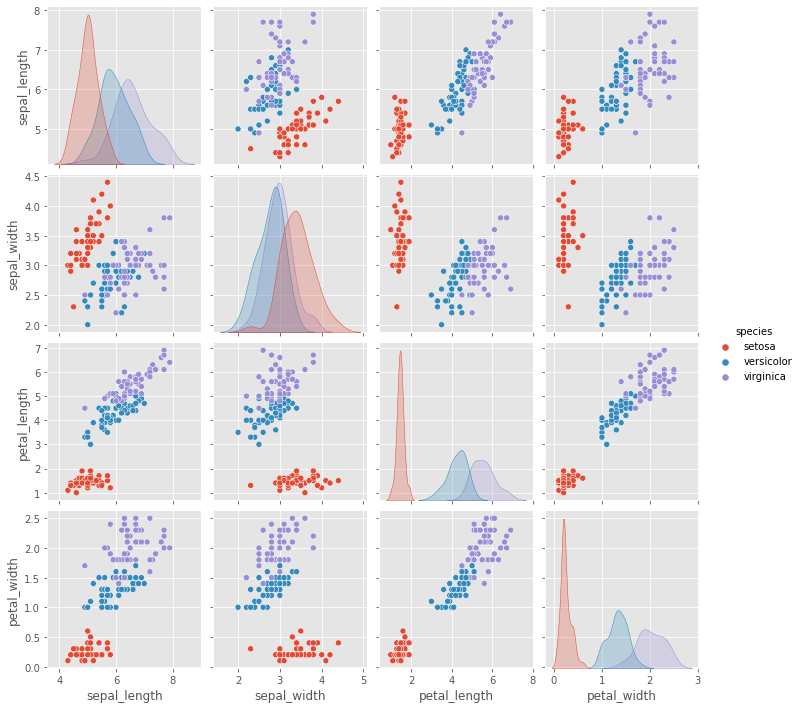

In [33]:
# Another look at this plot.
sns.pairplot(df, hue='species');

In [34]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

array(['other', 'setosa'], dtype=object)

In [35]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [36]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

<br>

## Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [37]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [38]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [39]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [40]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [41]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa'], dtype=object)

In [42]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     36
False     2
Name: species, dtype: int64

In [43]:
# What proportion were correct?
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9473684210526315

<br>

## $k$ Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

***

In [44]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [45]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [46]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [47]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [48]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [49]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9473684210526315

In [50]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True     36
False     2
Name: species, dtype: int64

In [51]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

True     0.947368
False    0.052632
Name: species, dtype: float64

<br>

## Cross validation

https://scikit-learn.org/stable/modules/cross_validation.html

***

In [52]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [53]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [54]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

C:\Users\Ian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [55]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


## End